In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import datetime
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# 1. Cargar datos
# Cargar el dataset del Titanic desde un archivo CSV o enlace
data = pd.read_csv("titanic.csv")  # Asegúrate de descargar el dataset
# Preprocesamiento básico: selecciona columnas útiles y trata valores nulos
data = data[["Pclass", "Sex", "Age", "Survived"]].dropna()
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})  # Codificar género

In [3]:
# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Completa aquí: define X, y y realiza el split con train_test_split
y = data['Survived']
X = data.drop(columns=['Survived'], axis=1)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [5]:
y.value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [31]:
# 3. Entrenar un modelo simple
titanic_model = LogisticRegression()
titanic_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = titanic_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [33]:
acierto = accuracy_score(y_test, y_pred)
acierto

0.7482517482517482

In [34]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[69, 18],
       [18, 38]])

In [36]:
with open("titanic_model.pkl", "wb") as f:
    pickle.dump(titanic_model, f)
    pass
print("Modelo guardado como titanic_model.pkl")

Modelo guardado como titanic_model.pkl


In [8]:
connection = sqlite3.connect("predictions.db")  
crsr = connection.cursor()

In [11]:
query = ''' SELECT prediction FROM predictions'''
crsr.execute(query)
data = crsr.fetchall()
data

[(0,), (0,), (0,), (0,), (0,), (0,), (0,)]

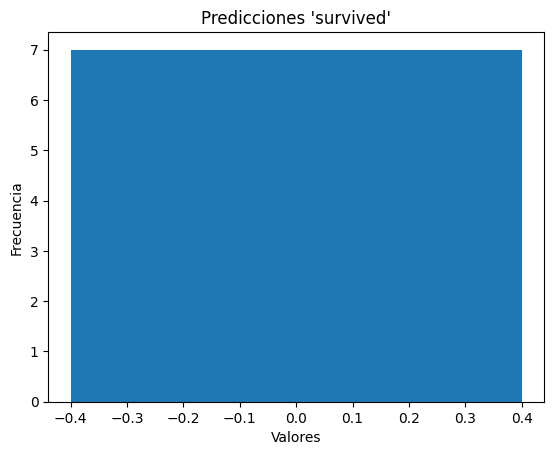

In [ ]:
predictions = [pred[0] for pred in data] 
predictions

unique_values = list(set(predictions))  # Obtener los valores únicos (0 y 1)
frequencies = [predictions.count(value) for value in unique_values]  # Contar cada valor

# Crear el gráfico de barras
plt.bar(unique_values, frequencies)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Predicciones 'survived'")
plt.show()